<h1><center>Segmentación de imagenes: Método de conjunto de nivel</center></h1>
<center><strong>Análisis Numérico de Ecuaciones en Derivadas Parciales:Teoría y Laboratorio</strong></center>
<center>Autores: Felipe Urrutia, Daniel Minaya, Sebastian Toloza</center>
<center>Tutor: Axel Osses A., Auxiliar: Emir N. Chacra</center>

# Resultados avanzados

Estudio del conjunto de datos [PASCAL 2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html) para la segmentacion de imagenes

In [28]:
import platform
from class_levelsetmethod import LevelSetMethod, Image, np, plt, animation, os, ImageOps, ListedColormap, pickle
platform.processor()

'AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD'

In [316]:
def get_groud_truth(id_name):
    img_r = Image.open(f"dataset/database_pascal/{id_name}.png").convert("L")

    dim_r = (img_r.size[1], img_r.size[0])

    if dim_r[0]>100:
        basewidth = 100
        wpercent = (basewidth/float(img_r.size[0]))
        hsize = int((float(img_r.size[1])*float(wpercent)))
        img_r = img_r.resize((basewidth,hsize), Image.ANTIALIAS)


    dim_r = (img_r.size[1], img_r.size[0])

    img_r = ImageOps.posterize(img_r, 4)
    img_r = np.array(img_r.getdata()).reshape((dim_r[0], dim_r[1]))
    img_r = (255*(img_r-np.min(img_r))/(np.max(img_r)-np.min(img_r))).astype(int)

    img_r = ((img_r>np.mean(img_r))).astype(int)
    return img_r

def precision_recall(y_real, y_pred, pos_label=1):
    tp = np.sum( (y_real==y_pred) & (y_pred==pos_label) )
    p = np.sum( y_real==pos_label )
    recall = tp/p
    
    fp = np.sum( (y_real!=y_pred) & (y_pred==pos_label) )
    precision = tp/(tp+fp)
    
    return precision, recall

def plot_precision_recall(img_r, iterations):
    clf = [(un>0).astype(int) for un in iterations]
    
    precision_recall_curve = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf]
    precision = np.array([prc_k[0] for prc_k in precision_recall_curve])
    recall = np.array([prc_k[1] for prc_k in precision_recall_curve])
    
    best_iter= np.argmax((2*precision*recall)/(precision+recall))
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    ax.scatter(precision, recall, c=range(len(precision_recall_curve)), cmap="plasma")
    ax.scatter([precision[best_iter]], [recall[best_iter]], c="red", s=50, label=f"Iter: {best_iter}\nRecall: {100*recall[best_iter]: .1f}\%\nPrecision: {100*precision[best_iter]: .1f}\%")
    ax.set_yticks(np.linspace(3/4, 1, 5).round(2));
    ax.set_xticks(np.linspace(3/4, 1, 5).round(2));
    
    plt_eps = 0.01
    plt.xticks(fontsize=18*0.8)
    plt.yticks(fontsize=18*0.8)
    
    ax.set_xlim([3/4-plt_eps, 1+plt_eps])
    ax.set_ylim([3/4-plt_eps, 1+plt_eps])
    ax.set_ylabel("Recall", fontsize=18)
    ax.set_xlabel("Precision", fontsize=18)
    
    plt.grid()
    ax.legend(fontsize=18*0.8)
    
    ax.set_title("Precision vs Recall", fontsize=18*1.5);
    
    plt.gca().set_aspect('equal')


In [325]:
%%time
pascal_images = ["2009_001314", "2008_004621"]
# path_save_file_per_test = {}
dic_img_arr = {}
for id_name in pascal_images:
    img_o = Image.open(f"dataset/database_pascal/{id_name}.jpg").convert("L")
    dim = (img_o.size[1], img_o.size[0])
    img = np.array(img_o.getdata()).reshape((dim[0], dim[1]))
    dic_img_arr[id_name] = img

Wall time: 38 ms


<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [457 500]
|img_min/max: (16, 195)
|new_img_min/max(resize): (1.0477378966863588e-08, 5.991934994504968e-08)
|new_dim:     [ 91 100]
|new_img_min/max(norm): (0, 255)
|size_domain: 9100
</set_image>
Wall time: 17 ms


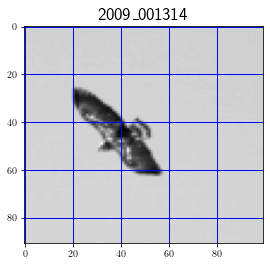

In [239]:
%%time
id_name = pascal_images[0]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)

Wall time: 166 ms


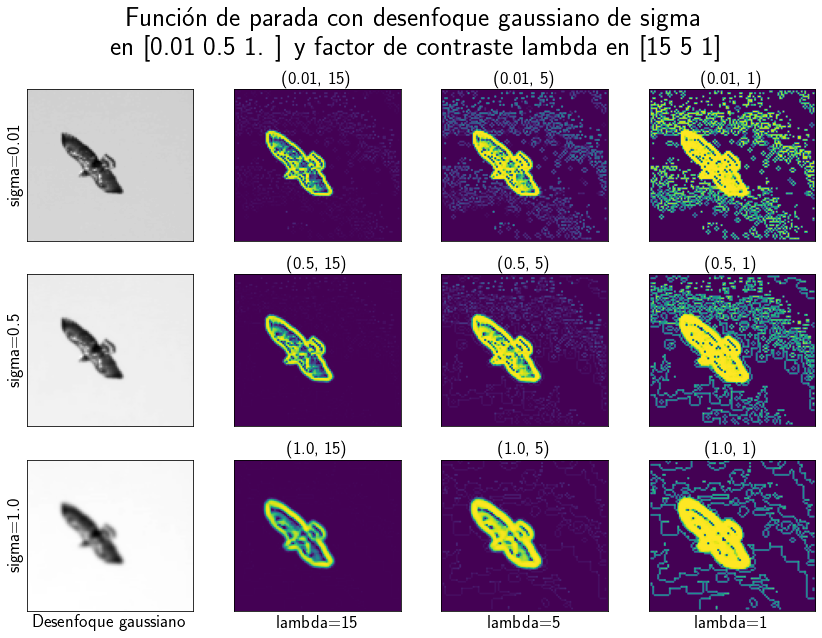

In [240]:
%%time
segmentator.eval_stopfunct(
    list_sgm=np.array([0.01, 0.5, 1]), 
    list_lmbd=np.array([15, 5, 1]),
    cmap="viridis_r"
)
plt.tight_layout()

In [241]:
%%time
segmentator.set_stopfunct(
    sgm=0.01, 
    lmbd=5,
)

<set_stopfunct> sigma: 0.01, lambda: 5
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.0006260956674179814, 1.0)
</set_stopfunct>
Wall time: 2 ms


Wall time: 18 ms


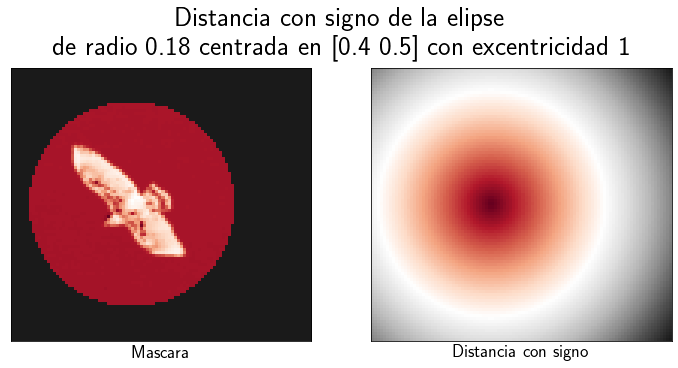

In [242]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.4, 0.5]), 
    r=0.18,
    e=1
)

In [243]:
%%time
segmentator.set_sgndist(
    c=np.array([0.4, 0.5]), 
    r=0.18,
    e=1
)

<set_sgndist> centro: [0.4 0.5], radio: 0.18, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


Wall time: 41 ms


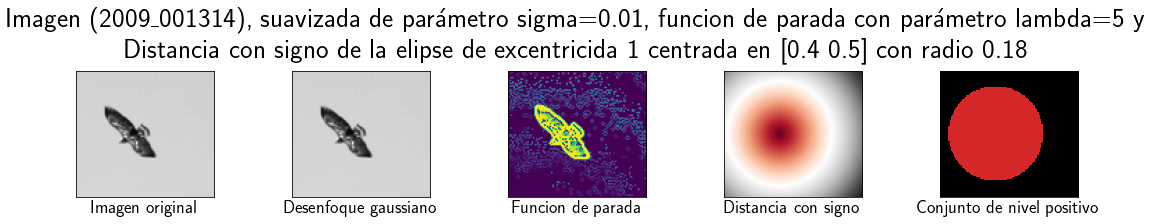

In [244]:
%%time 
segmentator.show_setting(cmap_stopfunct="viridis_r")

In [245]:
%%time 
segmentator.print_setting()

<print_setting>
|sigma: 0.01
|lambda: 5
|centro: [0.4 0.5]
|radio: 0.18
|excentricidad: 1
</print_setting>
Wall time: 1e+03 µs


In [247]:
%%time
segmentator.solve(
    n_iter = 150,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 150, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/2009_001314__iterations_times__sgm_0_01__lmbd_5__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.2s, T trans:  4.1s, T per iter: 2.0s p/m  0.2s, T rest:  307.4s p/m  2.1s
|Iter: 6, T iter: 1.9s, T trans:  13.5s, T per iter: 1.9s p/m  0.1s, T rest:  280.1s p/m  1.4s
|Iter: 11, T iter: 2.3s, T trans:  23.4s, T per iter: 1.9s p/m  0.1s, T rest:  272.8s p/m  1.6s
|Iter: 16, T iter: 1.9s, T trans:  32.9s, T per iter: 1.9s p/m  0.1s, T rest:  261.1s p/m  1.3s
|Iter: 21, T iter: 2.2s, T trans:  42.7s, T per iter: 1.9s p/m  0.1s, T rest:  252.5s p/m  1.4s
|Iter: 26, T iter: 1.9s, T trans:  52.3s, T per iter: 1.9s p/m  0.1s, T rest:  242.0s p/m  1.2s
|Iter: 31, T iter: 1.9s, T trans:  61.8s, T per iter: 1.9s p/m  0.1s, T rest:  231.6s p/m  1.1s
|Iter: 36, T iter: 1.9s, T trans:  71.3s, T per iter: 1.9s p/m  0.1s, T rest:  221.5s p/m  1.0s
|Iter: 41, T iter: 2.3s, T trans:  81.1s, 

Wall time: 69.1 ms


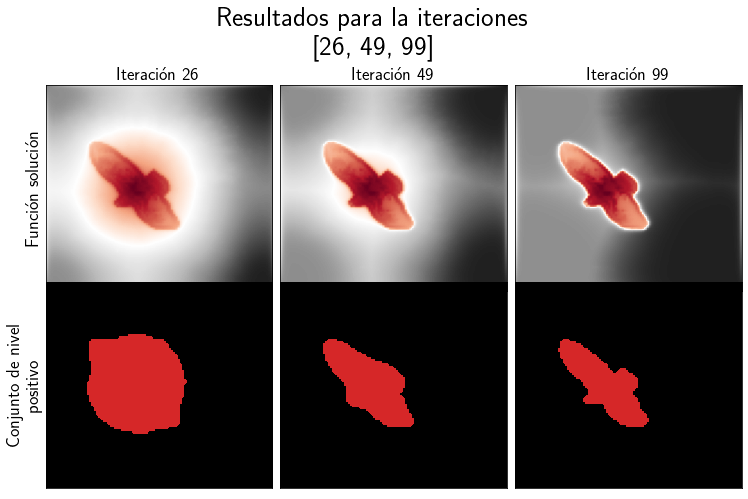

In [248]:
%%time
segmentator.show_solution(
    show_iters=[26, 49, 99]
)

In [249]:
path_save_file_per_test["test_0"] = segmentator.path_save_file

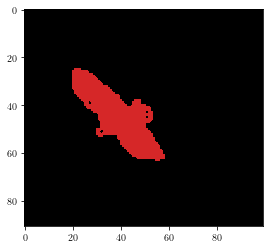

In [250]:
img_r = get_groud_truth(segmentator.id_name)
plt.imshow(img_r, cmap=ListedColormap(['black','tab:red']));

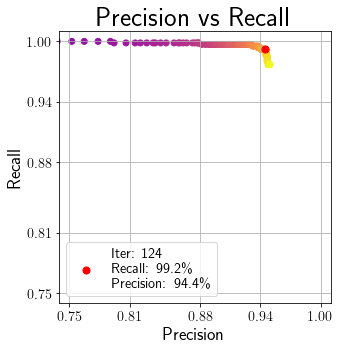

In [251]:
plot_precision_recall(img_r, segmentator.iterations)

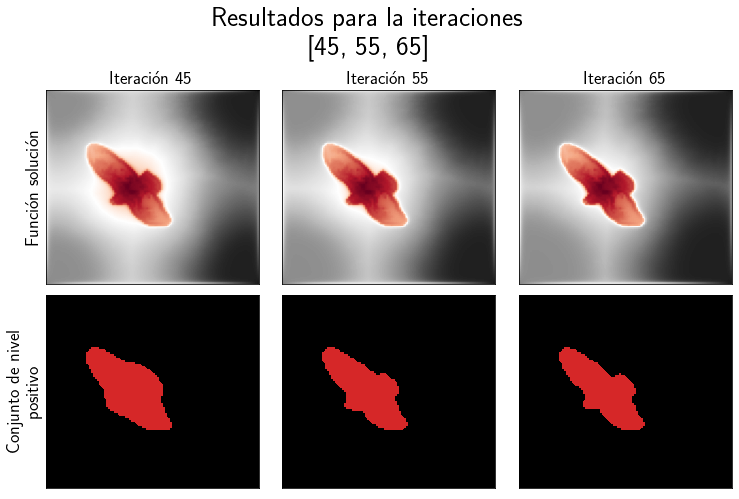

In [252]:
segmentator.show_solution(
    show_iters=[45, 55, 65]
)
plt.tight_layout()

In [253]:
%%time
segmentator.set_stopfunct(
    sgm=0.01, 
    lmbd=15,
)

<set_stopfunct> sigma: 0.01, lambda: 15
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.005606777971592324, 1.0)
</set_stopfunct>
Wall time: 1.54 ms


In [254]:
%%time
segmentator.solve(
    n_iter = 150,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 150, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/2009_001314__iterations_times__sgm_0_01__lmbd_15__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.0s, T trans:  4.0s, T per iter: 2.0s p/m  0.0s, T rest:  296.8s p/m  0.0s
|Iter: 6, T iter: 2.0s, T trans:  13.8s, T per iter: 2.0s p/m  0.0s, T rest:  286.4s p/m  0.1s
|Iter: 11, T iter: 2.0s, T trans:  23.6s, T per iter: 2.0s p/m  0.0s, T rest:  275.6s p/m  0.1s
|Iter: 16, T iter: 1.9s, T trans:  33.5s, T per iter: 2.0s p/m  0.0s, T rest:  265.9s p/m  0.2s
|Iter: 21, T iter: 2.0s, T trans:  43.4s, T per iter: 2.0s p/m  0.0s, T rest:  256.5s p/m  0.3s
|Iter: 26, T iter: 1.9s, T trans:  53.1s, T per iter: 2.0s p/m  0.0s, T rest:  245.8s p/m  0.3s
|Iter: 31, T iter: 2.0s, T trans:  62.9s, T per iter: 2.0s p/m  0.0s, T rest:  235.9s p/m  0.3s
|Iter: 36, T iter: 1.9s, T trans:  72.7s, T per iter: 2.0s p/m  0.0s, T rest:  225.9s p/m  0.3s
|Iter: 41, T iter: 2.0s, T trans:  82.4s,

Wall time: 82.1 ms


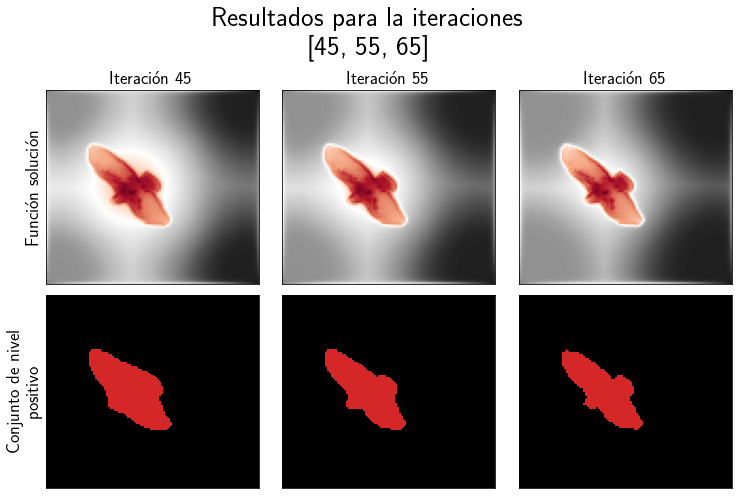

In [255]:
%%time
segmentator.show_solution(
    show_iters=[45, 55, 65]
)
plt.tight_layout()

In [256]:
path_save_file_per_test["test_1"] = segmentator.path_save_file

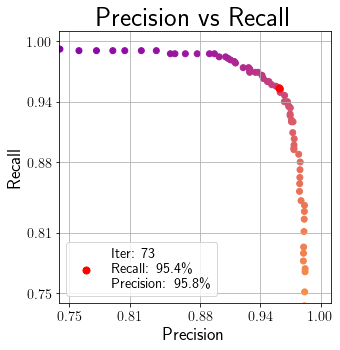

In [257]:
plot_precision_recall(img_r, segmentator.iterations)

In [258]:
%%time
segmentator.set_stopfunct(
    sgm=0.01, 
    lmbd=1,
)

<set_stopfunct> sigma: 0.01, lambda: 1
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (2.5058888387711116e-05, 1.0)
</set_stopfunct>
Wall time: 999 µs


In [259]:
%%time
segmentator.solve(
    n_iter = 150,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 150, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/2009_001314__iterations_times__sgm_0_01__lmbd_1__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.0s, T trans:  4.0s, T per iter: 2.0s p/m  0.0s, T rest:  300.3s p/m  0.5s
|Iter: 6, T iter: 2.0s, T trans:  14.2s, T per iter: 2.0s p/m  0.1s, T rest:  294.2s p/m  0.7s
|Iter: 11, T iter: 2.0s, T trans:  24.2s, T per iter: 2.0s p/m  0.0s, T rest:  282.0s p/m  0.5s
|Iter: 16, T iter: 2.1s, T trans:  34.5s, T per iter: 2.0s p/m  0.1s, T rest:  274.1s p/m  0.6s
|Iter: 21, T iter: 2.3s, T trans:  44.6s, T per iter: 2.0s p/m  0.1s, T rest:  263.6s p/m  0.9s
|Iter: 26, T iter: 2.0s, T trans:  54.4s, T per iter: 2.0s p/m  0.1s, T rest:  251.8s p/m  0.9s
|Iter: 31, T iter: 2.4s, T trans:  64.8s, T per iter: 2.0s p/m  0.1s, T rest:  242.9s p/m  1.1s
|Iter: 36, T iter: 2.0s, T trans:  74.8s, T per iter: 2.0s p/m  0.1s, T rest:  232.4s p/m  1.0s
|Iter: 41, T iter: 2.3s, T trans:  84.9s, 

Wall time: 83.1 ms


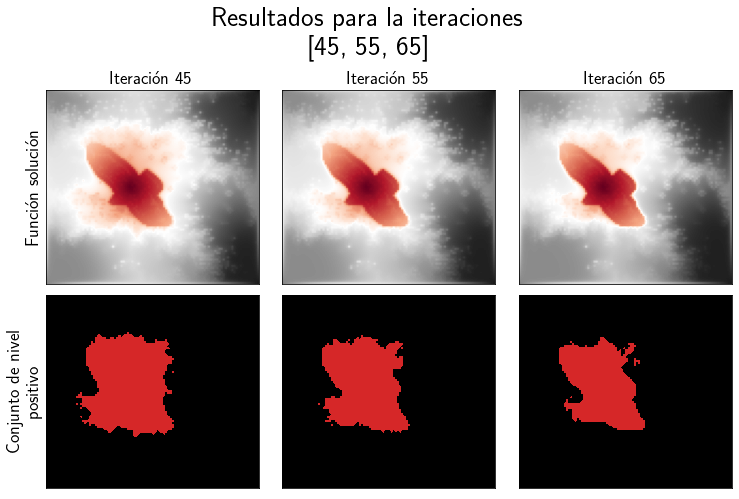

In [260]:
%%time
segmentator.show_solution(
    show_iters=[45, 55, 65]
)
plt.tight_layout()

In [261]:
path_save_file_per_test["test_2"] = segmentator.path_save_file

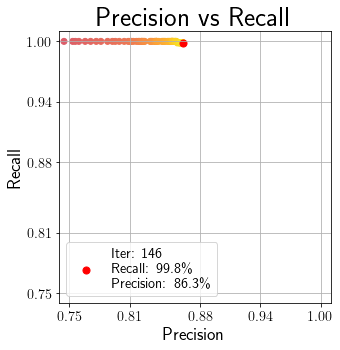

In [262]:
plot_precision_recall(img_r, segmentator.iterations)

In [263]:
%%time
segmentator.set_stopfunct(
    sgm=1, 
    lmbd=5,
)

<set_stopfunct> sigma: 1, lambda: 5
|gauss_min/max: (11, 213)
|stopfunct_min/max:     (0.005533421868083223, 1.0)
</set_stopfunct>
Wall time: 2 ms


In [264]:
%%time
segmentator.solve(
    n_iter = 150,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 150, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/2009_001314__iterations_times__sgm_1__lmbd_5__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 1.9s, T trans:  3.8s, T per iter: 1.9s p/m  0.0s, T rest:  285.9s p/m  0.4s
|Iter: 6, T iter: 1.9s, T trans:  13.5s, T per iter: 1.9s p/m  0.0s, T rest:  279.0s p/m  0.3s
|Iter: 11, T iter: 1.9s, T trans:  23.2s, T per iter: 1.9s p/m  0.0s, T rest:  270.3s p/m  0.3s
|Iter: 16, T iter: 1.9s, T trans:  32.9s, T per iter: 1.9s p/m  0.0s, T rest:  260.9s p/m  0.2s
|Iter: 21, T iter: 2.0s, T trans:  42.6s, T per iter: 1.9s p/m  0.0s, T rest:  251.8s p/m  0.3s
|Iter: 26, T iter: 2.0s, T trans:  52.4s, T per iter: 1.9s p/m  0.0s, T rest:  242.5s p/m  0.2s
|Iter: 31, T iter: 1.9s, T trans:  62.0s, T per iter: 1.9s p/m  0.0s, T rest:  232.6s p/m  0.2s
|Iter: 36, T iter: 2.0s, T trans:  71.8s, T per iter: 1.9s p/m  0.0s, T rest:  223.1s p/m  0.2s
|Iter: 41, T iter: 2.4s, T trans:  82.1s, T p

Wall time: 83.1 ms


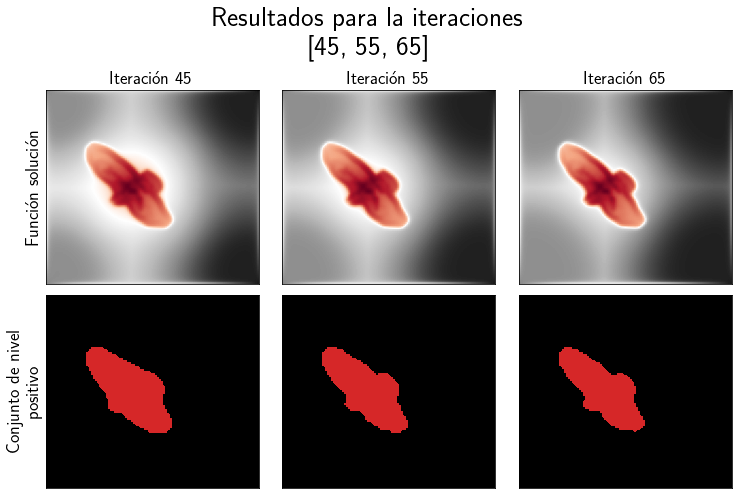

In [265]:
%%time
segmentator.show_solution(
    show_iters=[45, 55, 65]
)
plt.tight_layout()

In [266]:
path_save_file_per_test["test_3"] = segmentator.path_save_file

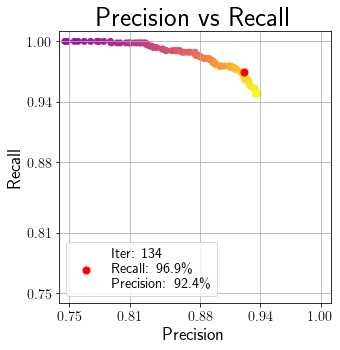

In [269]:
plot_precision_recall(img_r, segmentator.iterations)

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [375 500]
|img_min/max: (0, 147)
|new_img_min/max(resize): (2.5611370807889267e-09, 6.44940883071381e-08)
|new_dim:     [ 75 100]
|new_img_min/max(norm): (0, 255)
|size_domain: 7500
</set_image>
Wall time: 20 ms


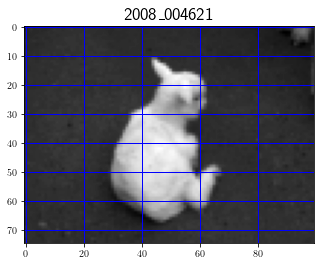

In [326]:
%%time
id_name = "2008_004621"
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)

Wall time: 704 ms


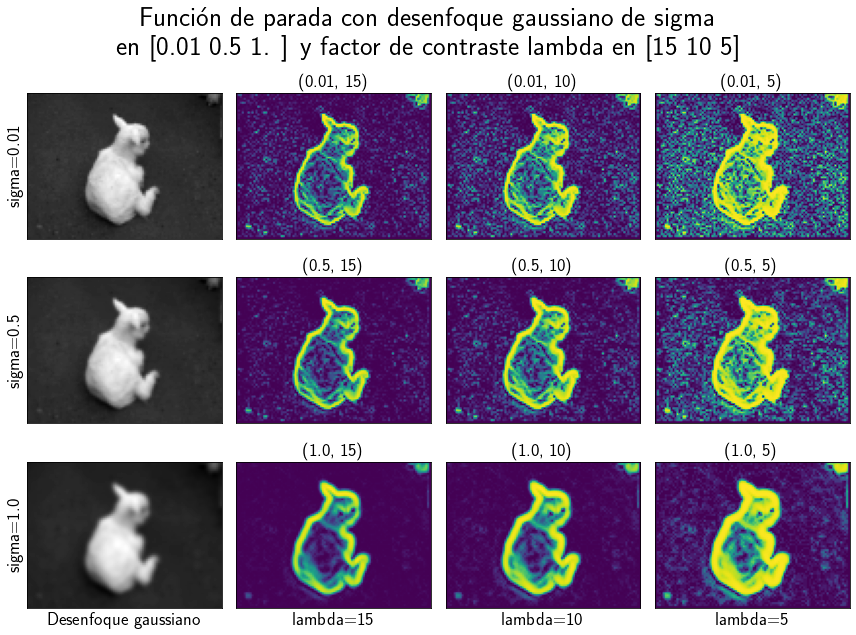

In [328]:
%%time
segmentator.eval_stopfunct(
    list_sgm=np.array([0.01, 0.5, 1]), 
    list_lmbd=np.array([15, 10, 5]),
    cmap="viridis_r"
)
plt.tight_layout()

In [329]:
%%time
segmentator.set_stopfunct(
    sgm=0.01, 
    lmbd=10,
)

<set_stopfunct> sigma: 0.01, lambda: 10
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.003482136639041715, 1.0)
</set_stopfunct>
Wall time: 1 ms


# Graficos

## Estaticos

## Dinamicos

In [317]:
%%time
iterations_0, _ = pickle.load(open(path_save_file_per_test["test_0"]+".pickle", "rb"))
iterations_1, _ = pickle.load(open(path_save_file_per_test["test_1"]+".pickle", "rb"))
iterations_2, _ = pickle.load(open(path_save_file_per_test["test_2"]+".pickle", "rb"))
iterations_3, _ = pickle.load(open(path_save_file_per_test["test_3"]+".pickle", "rb"))
print(path_save_file_per_test["test_0"], path_save_file_per_test["test_1"], path_save_file_per_test["test_2"], path_save_file_per_test["test_3"], sep="\n")

results/2009_001314__iterations_times__sgm_0_01__lmbd_5__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
results/2009_001314__iterations_times__sgm_0_01__lmbd_15__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
results/2009_001314__iterations_times__sgm_0_01__lmbd_1__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
results/2009_001314__iterations_times__sgm_1__lmbd_5__cx_0_4__cy_0_5__r_0_18__e_1__tau_0_1__k_-5
Wall time: 31 ms


In [318]:
id_name = pascal_images[0]
dim = [91, 100]
cmap_sgndist = "RdGy_r"
img_r = get_groud_truth(id_name)
img_o = Image.open(f"dataset/database_pascal/{id_name}.jpg")

clf_0 = [(un>0).astype(int) for un in iterations_0]
clf_1 = [(un>0).astype(int) for un in iterations_1]
clf_2 = [(un>0).astype(int) for un in iterations_2]
clf_3 = [(un>0).astype(int) for un in iterations_3]

precision_recall_curve_0 = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf_0]
precision_0 = np.array([prc_k[0] for prc_k in precision_recall_curve_0])
recall_0 = np.array([prc_k[1] for prc_k in precision_recall_curve_0])

precision_recall_curve_1 = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf_1]
precision_1 = np.array([prc_k[0] for prc_k in precision_recall_curve_1])
recall_1 = np.array([prc_k[1] for prc_k in precision_recall_curve_1])

precision_recall_curve_2 = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf_2]
precision_2 = np.array([prc_k[0] for prc_k in precision_recall_curve_2])
recall_2 = np.array([prc_k[1] for prc_k in precision_recall_curve_2])

precision_recall_curve_3 = [precision_recall(img_r, clf_k, pos_label=1) for clf_k in clf_3]
precision_3 = np.array([prc_k[0] for prc_k in precision_recall_curve_3])
recall_3 = np.array([prc_k[1] for prc_k in precision_recall_curve_3])

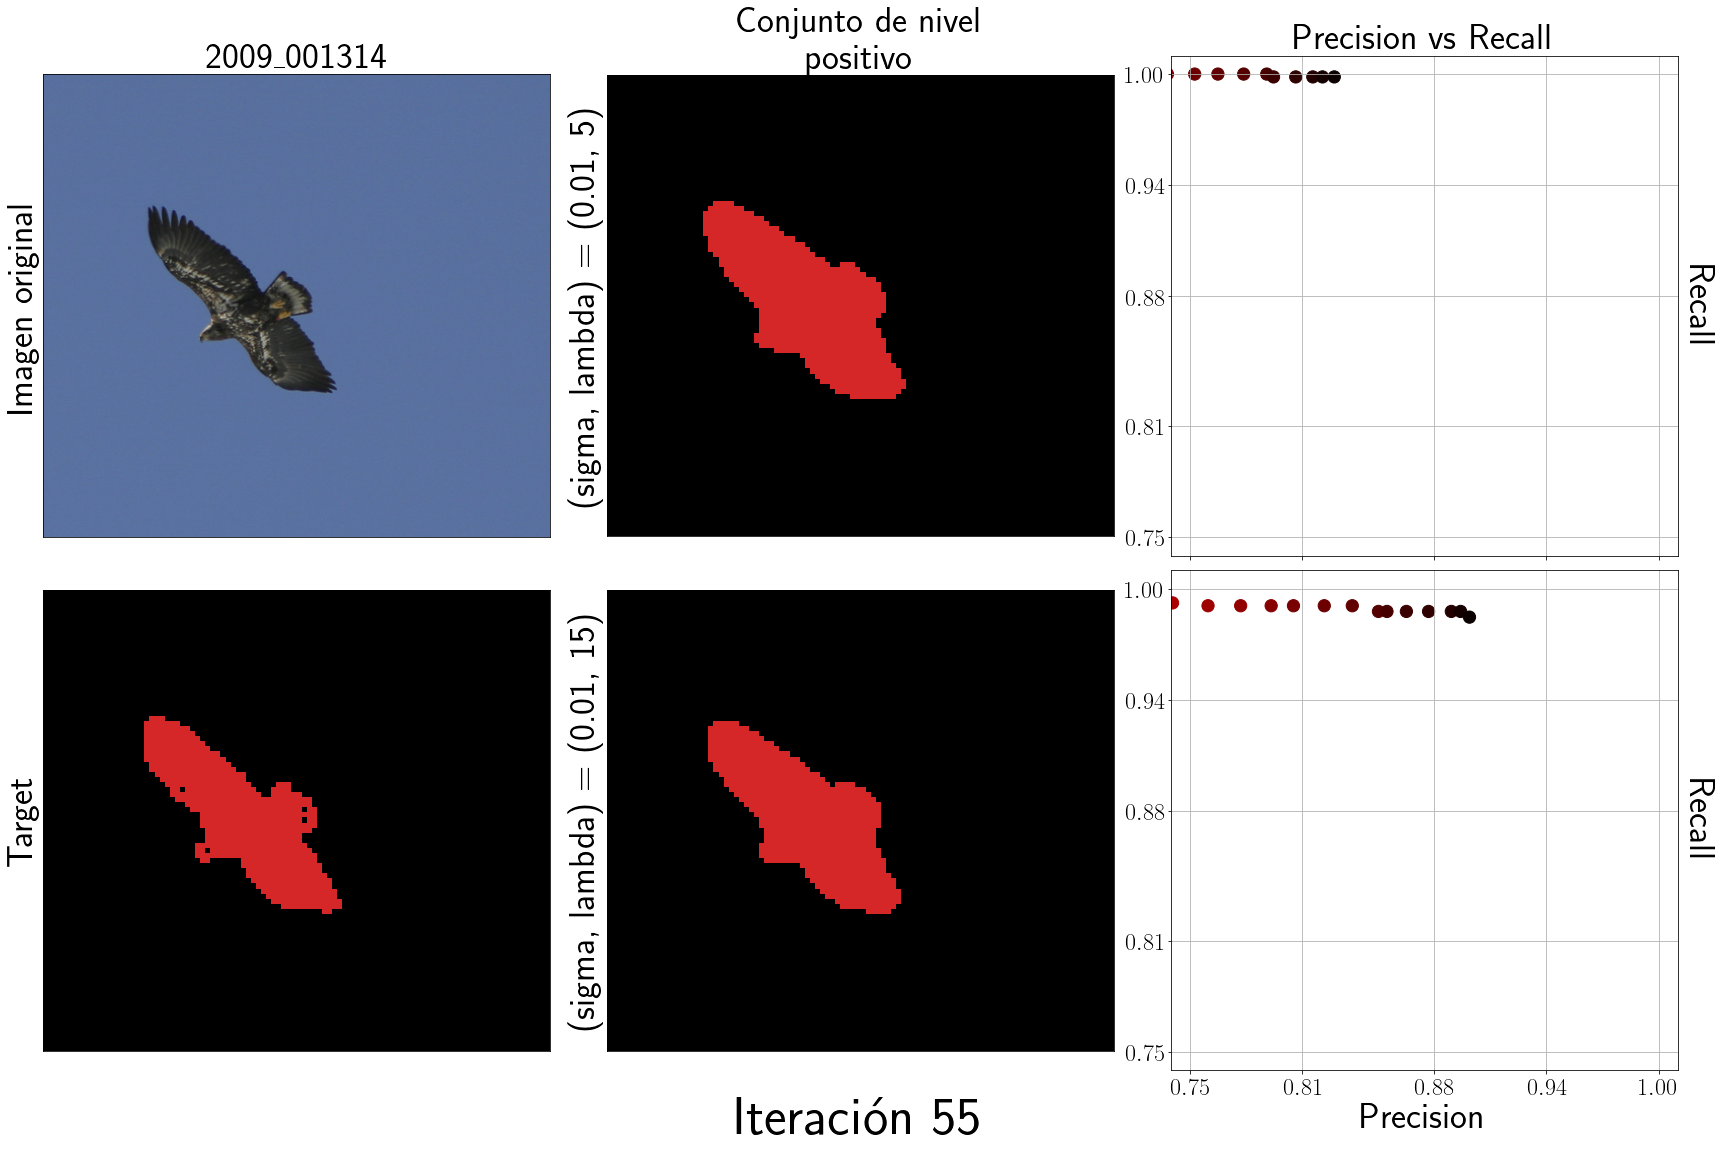

In [319]:
# %%time
fig = plt.figure(figsize=(8*3,8*2))

cmap_pr = "hot_r"
plt_eps = 0.01

iter_k = 55

sgm_lmbd_0 = (0.01, 5)  #0
sgm_lmbd_1 = (0.01, 15) #1
 
# sgm_lmbd_0 = (0.01, 5)  #0
# sgm_lmbd_1 = (0.01, 1)  #2

# sgm_lmbd_0 = (0.01, 5)  #0
# sgm_lmbd_1 = (1, 5)     #3

zz_0 = iterations_0[iter_k]
zz_1 = iterations_1[iter_k]

# zz_0 = iterations_0[iter_k]
# zz_1 = iterations_2[iter_k]

# zz_0 = iterations_0[iter_k]
# zz_1 = iterations_3[iter_k]

x = np.linspace(0, 1, dim[1])
y = np.linspace(0, 1, dim[0])
xx, yy = np.meshgrid(x, y)

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.imshow(img_o)
    
ax4.imshow(img_r, cmap=ListedColormap(['black','tab:red']))

ax2.imshow((zz_0>0), cmap=ListedColormap(['black','tab:red']))

ax5.imshow((zz_1>0), cmap=ListedColormap(['black','tab:red']))

ax3.scatter(precision_0[:iter_k], recall_0[:iter_k], c=range(iter_k), cmap=cmap_pr, s=50*3)

ax6.scatter(precision_1[:iter_k], recall_1[:iter_k], c=range(iter_k), cmap=cmap_pr, s=50*3)

ax1.set_xticks([])
ax1.set_yticks([])

ax4.set_xticks([])
ax4.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax5.set_xticks([])
ax5.set_yticks([])

ax3.set_yticks(np.linspace(3/4, 1, 5).round(2));
ax3.set_xticks(np.linspace(3/4, 1, 5).round(2));
ax3.set_xticklabels(["" for _ in range(5)]);
ax3.tick_params(labelsize = 24)
ax3.grid()
ax3.set_xlim([3/4-plt_eps, 1+plt_eps])
ax3.set_ylim([3/4-plt_eps, 1+plt_eps])
ax3.set_ylabel("Recall", fontsize=18*2, rotation=270)
ax3.yaxis.set_label_coords(1.01, 0.5)

ax6.set_yticks(np.linspace(3/4, 1, 5).round(2));
ax6.set_xticks(np.linspace(3/4, 1, 5).round(2));
ax6.tick_params(labelsize = 24)
ax6.grid()
ax6.set_xlim([3/4-plt_eps, 1+plt_eps])
ax6.set_ylim([3/4-plt_eps, 1+plt_eps])
ax6.set_ylabel("Recall", fontsize=18*2, rotation=270)
ax6.yaxis.set_label_coords(1.01, 0.5)
ax6.set_xlabel("Precision", fontsize=18*2)

ax1.set_title(id_name, size=18*2)
ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
ax3.set_title("Precision vs Recall", size=18*2)

ax1.set_ylabel("Imagen original", size=18*2)
ax4.set_ylabel("Target", size=18*2)

ax2.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_0)}", size=18*2)
ax5.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_1)}", size=18*2)

ax5.set_xlabel(f"Iteración {iter_k}", size=18*3)
ax5.xaxis.set_label_coords(0.5, -0.1)

plt.tight_layout()

MovieWriter ffmpeg unavailable; using Pillow instead.


Wall time: 29.5 s


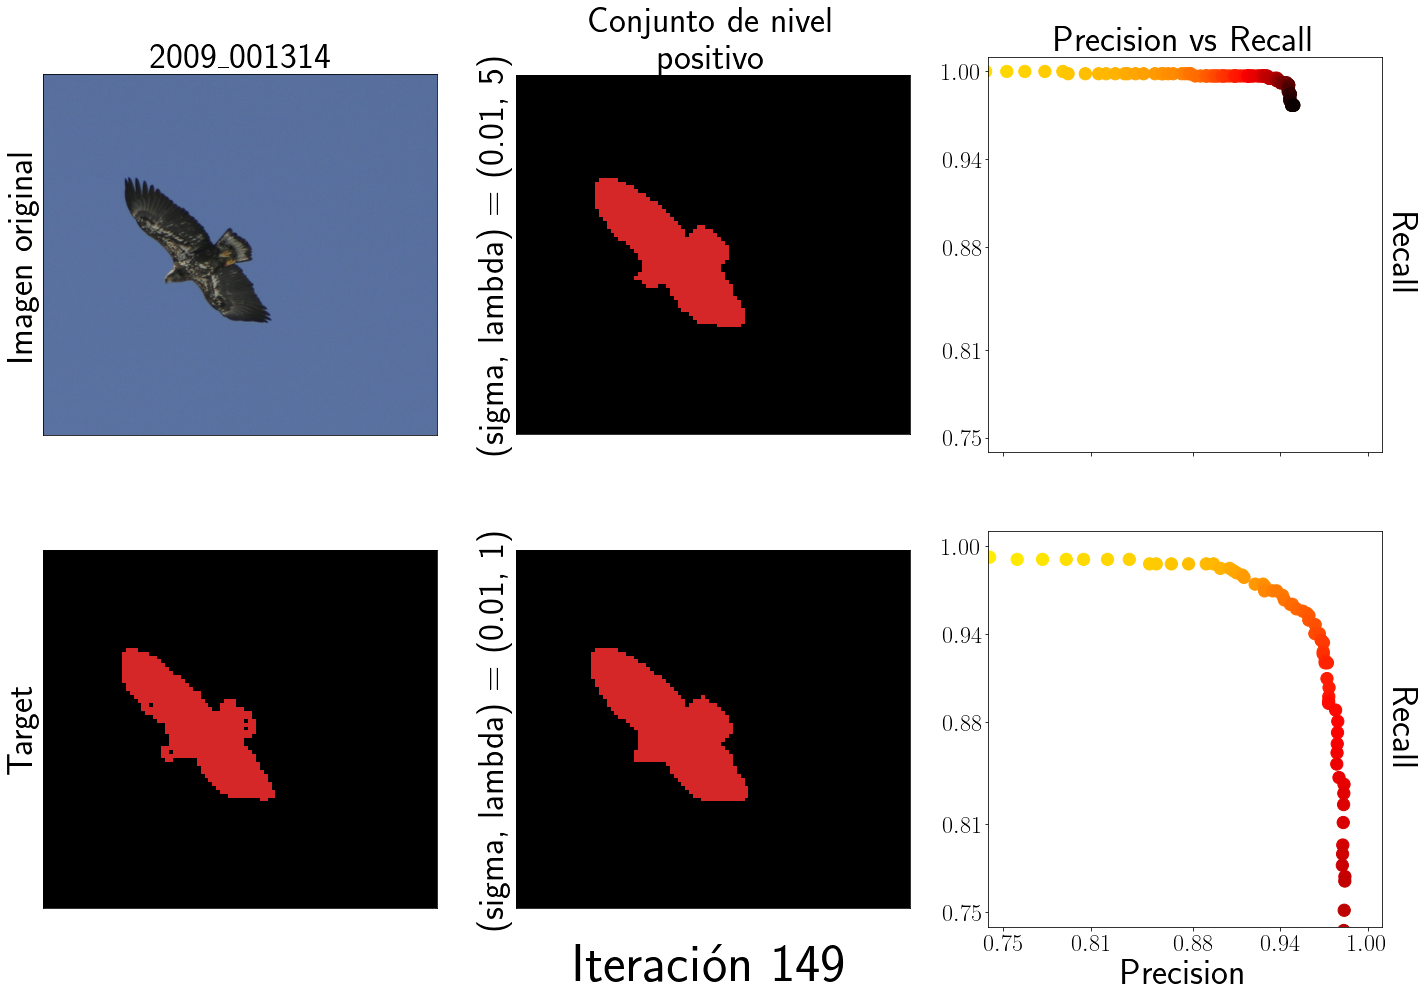

In [322]:
%%time
fps = 250
frn = 150

id_test = "0_3"

# sgm_lmbd_0 = (0.01, 5)  #0
# sgm_lmbd_1 = (0.01, 15) #1
 
# sgm_lmbd_0 = (0.01, 5)  #0
# sgm_lmbd_1 = (0.01, 1)  #2

sgm_lmbd_0 = (0.01, 5)  #0
sgm_lmbd_1 = (1, 5)     #3

# zz_0 = iterations_0
# zz_1 = iterations_1

# zz_0 = iterations_0
# zz_1 = iterations_2

zz_0 = iterations_0
zz_1 = iterations_3

zarray_0 = np.zeros((dim[0], dim[1], frn))
zarray_1 = np.zeros((dim[0], dim[1], frn))

parray_0 = np.zeros(frn+1)
parray_1 = np.zeros(frn+1)

rarray_0 = np.zeros(frn+1)
rarray_1 = np.zeros(frn+1)

for i in range(frn):
    zarray_0[:, :, i] = zz_0[i]
    zarray_1[:, :, i] = zz_1[i]
    
    parray_0[i+1] = precision_0[i]
    parray_1[i+1] = precision_1[i]

    rarray_0[i+1] = recall_0[i]
    rarray_1[i+1] = recall_1[i]

zarray = np.array([zarray_0, zarray_1])
parray = np.array([parray_0, parray_1])
rarray = np.array([rarray_0, rarray_1])

def change_plot(frame_number, zarray, parray, rarray, plot):
    plot[0].remove()
    plot[0] = ax1.imshow(img_o)

    plot[1].remove()
    plot[1] = ax2.imshow((zarray[0][:, :, frame_number]>0), cmap=ListedColormap(['black','tab:red']))

    plot[2].remove()
    plot[2] = ax3.scatter(parray[0][:frame_number+1], rarray[0][:frame_number+1], c=range(frame_number+1), cmap=cmap_pr, s=50*3)

    plot[3].remove()
    plot[3] = ax4.imshow(img_r, cmap=ListedColormap(['black','tab:red']))

    plot[4].remove()
    plot[4] = ax5.imshow((zarray[1][:, :, frame_number]>0), cmap=ListedColormap(['black','tab:red']))

    plot[5].remove()
    plot[5] = ax6.scatter(parray[1][:frame_number+1], rarray[1][:frame_number+1], c=range(frame_number+1), cmap=cmap_pr, s=50*3)
    
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax4.set_xticks([])
    ax4.set_yticks([])

    ax2.set_xticks([])
    ax2.set_yticks([])

    ax5.set_xticks([])
    ax5.set_yticks([])

    ax3.set_yticks(np.linspace(3/4, 1, 5).round(2));
    ax3.set_xticks(np.linspace(3/4, 1, 5).round(2));
    ax3.set_xticklabels(["" for _ in range(5)]);
    ax3.tick_params(labelsize = 24)
#     ax3.grid()
    ax3.set_xlim([3/4-plt_eps, 1+plt_eps])
    ax3.set_ylim([3/4-plt_eps, 1+plt_eps])
    ax3.set_ylabel("Recall", fontsize=18*2, rotation=270)
    ax3.yaxis.set_label_coords(1.01, 0.5)

    ax6.set_yticks(np.linspace(3/4, 1, 5).round(2));
    ax6.set_xticks(np.linspace(3/4, 1, 5).round(2));
    ax6.tick_params(labelsize = 24)
#     ax6.grid()
    ax6.set_xlim([3/4-plt_eps, 1+plt_eps])
    ax6.set_ylim([3/4-plt_eps, 1+plt_eps])
    ax6.set_ylabel("Recall", fontsize=18*2, rotation=270)
    ax6.yaxis.set_label_coords(1.01, 0.5)
    ax6.set_xlabel("Precision", fontsize=18*2)

    ax1.set_title(id_name, size=18*2)
    ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
    ax3.set_title("Precision vs Recall", size=18*2)

    ax1.set_ylabel("Imagen original", size=18*2)
    ax4.set_ylabel("Target", size=18*2)

    ax2.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_0)}", size=18*2)
    ax5.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_1)}", size=18*2)

    ax5.set_xlabel(f"Iteración {frame_number}", size=18*3)
    ax5.xaxis.set_label_coords(0.5, -0.1)

    
fig = plt.figure(figsize=(8*3,8*2))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

plot = [
    ax1.imshow(img_o),
    ax4.imshow(img_r, cmap=ListedColormap(['black','tab:red'])),
    ax2.imshow((zarray[0][:, :, 0]>0), cmap=ListedColormap(['black','tab:red'])),
    ax5.imshow((zarray[1][:, :, 0]>0), cmap=ListedColormap(['black','tab:red'])),
    ax3.scatter(parray[0][:1], rarray[0][:1], c=range(1), cmap=cmap_pr, s=50*3),
    ax6.scatter(parray[1][:1], rarray[1][:1], c=range(1), cmap=cmap_pr, s=50*3)
]

ax1.set_xticks([])
ax1.set_yticks([])

ax4.set_xticks([])
ax4.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax5.set_xticks([])
ax5.set_yticks([])

ax3.set_yticks(np.linspace(3/4, 1, 5).round(2));
ax3.set_xticks(np.linspace(3/4, 1, 5).round(2));
ax3.set_xticklabels(["" for _ in range(5)]);
ax3.tick_params(labelsize = 24)
# ax3.grid()
ax3.set_xlim([3/4-plt_eps, 1+plt_eps])
ax3.set_ylim([3/4-plt_eps, 1+plt_eps])
ax3.set_ylabel("Recall", fontsize=18*2, rotation=270)
ax3.yaxis.set_label_coords(1.01, 0.5)

ax6.set_yticks(np.linspace(3/4, 1, 5).round(2));
ax6.set_xticks(np.linspace(3/4, 1, 5).round(2));
ax6.tick_params(labelsize = 24)
# ax6.grid()
ax6.set_xlim([3/4-plt_eps, 1+plt_eps])
ax6.set_ylim([3/4-plt_eps, 1+plt_eps])
ax6.set_ylabel("Recall", fontsize=18*2, rotation=270)
ax6.yaxis.set_label_coords(1.01, 0.5)
ax6.set_xlabel("Precision", fontsize=18*2)

ax1.set_title(id_name, size=18*2)
ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
ax3.set_title("Precision vs Recall", size=18*2)

ax1.set_ylabel("Imagen original", size=18*2)
ax4.set_ylabel("Target", size=18*2)

ax2.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_0)}", size=18*2)
ax5.set_ylabel(f"(sigma, lambda) = {str(sgm_lmbd_1)}", size=18*2)

ax5.set_xlabel(f"Iteración {iter_k}", size=18*3)
ax5.xaxis.set_label_coords(0.5, -0.1)

ani = animation.FuncAnimation(fig, change_plot, frn, fargs=(zarray, parray, rarray, plot), interval=1000 / fps)

path_name_gif = f"test_pascal_{id_test}"
ani.save(f'{path_name_gif}.gif');

In [323]:
mygif = Image.open(path_name_gif+".gif")

for frame in range(0, mygif.n_frames):
    mygif.seek(frame)
    mygif.save(f"{path_name_gif}_gif/"+"frame-"+str(frame)+".png")